<a href="https://colab.research.google.com/github/pedrovcardoso/trabalho-estatistica/blob/main/trabalho_estat%C3%ADstica_testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("readxl", "knitr", "tidyverse", "skimr"))

library(readxl)
library(knitr)
library(tidyverse)
library(skimr)
library(ggplot2)

dados <- read_excel("dados10.xlsx", sheet = "dados10")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
get_mode <- function(v) {
  v <- v[!is.na(v)]
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

colunas_interesse <- c("read12", "math12", "motheduc", "fatheduc", "lfaminc")

estatisticas_descritivas <- tibble(
  Medida = c("Mínimo", "Máximo", "Média", "Moda", "Mediana", "Desvio Padrão", "Variância", "Coeficiente de Variação (%)")
) %>%
  bind_cols(
    map_dfc(dados[colunas_interesse], ~ c(
      min(.x, na.rm = TRUE),
      max(.x, na.rm = TRUE),
      mean(.x, na.rm = TRUE),
      get_mode(.x),
      median(.x, na.rm = TRUE),
      sd(.x, na.rm = TRUE),
      var(.x, na.rm = TRUE),
      (sd(.x, na.rm = TRUE) / mean(.x, na.rm = TRUE)) * 100
    ))
  )

kable(estatisticas_descritivas,
      digits = 4,
      caption = "Tabela de Medidas Descritivas",
      format = "pipe")



Table: Tabela de Medidas Descritivas

|Medida                      |  read12|  math12| motheduc| fatheduc| lfaminc|
|:---------------------------|-------:|-------:|--------:|--------:|-------:|
|Mínimo                      | 29.7000| 30.1400|   8.0000|   8.0000|  6.2146|
|Máximo                      | 68.0900| 71.1200|  18.0000|  18.0000| 12.3458|
|Média                       | 51.7073| 51.8924|  13.3198|  13.6705| 10.3568|
|Moda                        | 67.5100| 50.7300|  14.0000|  14.0000| 10.6573|
|Mediana                     | 53.2550| 52.3900|  14.0000|  14.0000| 10.3090|
|Desvio Padrão               |  9.5679|  9.4610|   2.0220|   2.2953|  0.8032|
|Variância                   | 91.5449| 89.5107|   4.0884|   5.2683|  0.6452|
|Coeficiente de Variação (%) | 18.5040| 18.2320|  15.1804|  16.7900|  7.7555|

In [ ]:
dados_tratados <- dados %>%
  mutate(race_code = race) %>%

  mutate(
    race_name = case_when(
      race_code == 0 ~ "White",
      race_code == 1 ~ "Asian",
      race_code == 2 ~ "Hispan",
      race_code == 3 ~ "Black",
      TRUE ~ NA_character_
    ),
    gender = if_else(female == 1, "Female", "Male")
  ) %>%

  mutate(across(c(hsgrad, cathhs, parcath), as.logical)) %>%

  select(
    id, read12, math12, gender,
    motheduc, fatheduc, lfaminc, hsgrad, cathhs, parcath,
    race_code, race_name
  )

head(dados_tratados, 15)

id,read12,math12,gender,motheduc,fatheduc,lfaminc,hsgrad,cathhs,parcath,race_code,race_name
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>
1,55.92,66.48,Female,14.0,14,10.657260,NA,FALSE,TRUE,0,White
2,48.40,62.87,Male,14.0,18,11.042920,NA,FALSE,FALSE,0,White
3,57.52,64.95,Male,12.0,16,10.021270,NA,FALSE,TRUE,0,White
4,56.67,53.51,Female,11.5,11,10.308950,NA,FALSE,FALSE,0,White
5,31.53,34.68,Male,12.0,11,11.042920,NA,FALSE,FALSE,0,White
6,55.45,52.59,Female,14.0,11,10.657260,NA,FALSE,TRUE,2,Hispan
7,46.53,44.93,Female,16.0,16,11.042920,NA,FALSE,FALSE,3,Black
8,31.69,36.01,Female,8.0,12,7.600903,NA,FALSE,FALSE,0,White
9,63.44,47.81,Female,16.0,16,10.657260,NA,FALSE,FALSE,2,Hispan


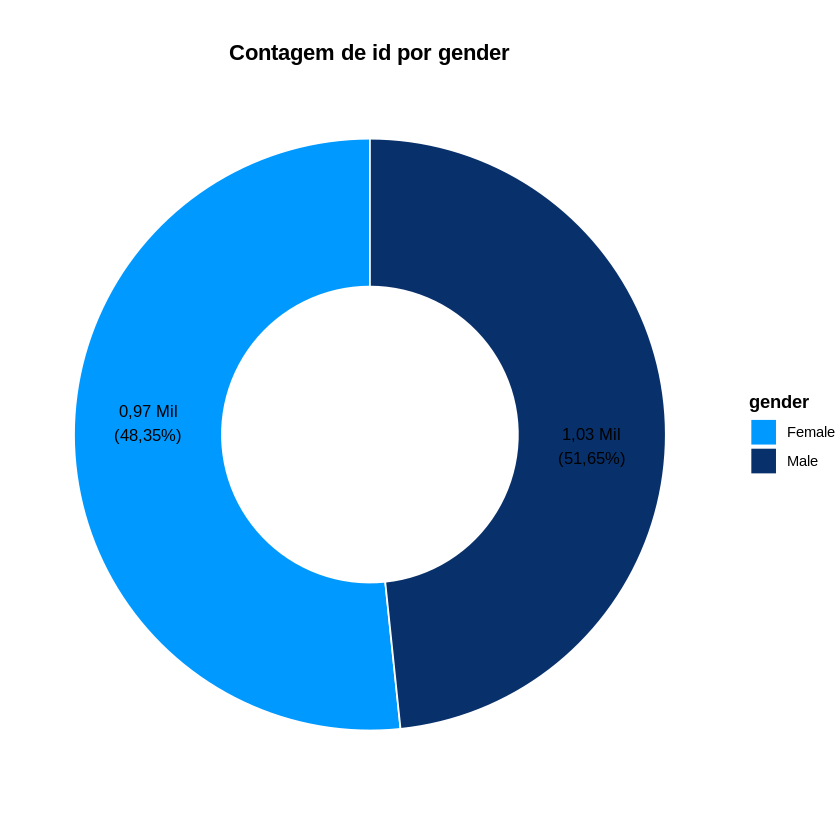

In [ ]:
# Carregar bibliotecas (boa prática, caso a célula seja executada de forma isolada)
library(ggplot2)
library(dplyr)
library(scales) # Para formatar eixos e rótulos

# Definir uma paleta de cores similar à da imagem
cores_azuis <- c("Female" = "#0099ff", "Male" = "#08306b")


# --- Gráfico 1: Gráfico de Rosca (Donut Chart) para Gênero ---

# 1. Preparar os dados para o gráfico de gênero
gender_data <- dados_tratados %>%
  filter(!is.na(gender)) %>%
  count(gender) %>%
  # Ordenar por gênero para garantir consistência nas cores
  arrange(gender) %>%
  # Calcular a posição do rótulo e o texto formatado
  mutate(
    percentage = n / sum(n) * 100,
    # Formata o rótulo para "14,46 Mil (51,65%)"
    label_text = paste0(
      format(round(n / 1000, 2), nsmall = 2, decimal.mark = ","), " Mil\n(",
      format(round(percentage, 2), nsmall = 2, decimal.mark = ","), "%)"
    ),
    # Posição y do rótulo no meio de cada fatia
    label_pos = cumsum(percentage) - 0.5 * percentage
  )

# 2. Criar o gráfico de Rosca
ggplot(gender_data, aes(x = 2, y = percentage, fill = gender)) +
  geom_col(width = 1, color = "white") + # Barras com borda branca para separar
  # Adiciona os rótulos de texto formatados
  geom_text(aes(y = label_pos, label = label_text), color = "black", size = 3.5) +
  # Converte para coordenadas polares (gráfico de pizza)
  coord_polar(theta = "y", start = 0) +
  # Cria o "buraco" no meio para o efeito de rosca
  xlim(c(0.5, 2.5)) +
  # Aplica a paleta de cores definida
  scale_fill_manual(values = cores_azuis) +
  # Adiciona o título
  labs(
    title = "Contagem de id por gender",
    fill = "gender" # Título da legenda
  ) +
  # Remove todos os elementos de tema desnecessários (eixos, fundo, etc.)
  theme_void() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"), # Centraliza o título
    legend.title = element_text(face = "bold")
  )

Warning message in prettyNum(.Internal(format(x, trim, digits, nsmall, width, 3L, :
“'big.mark' and 'decimal.mark' are both '.', which could be confusing”


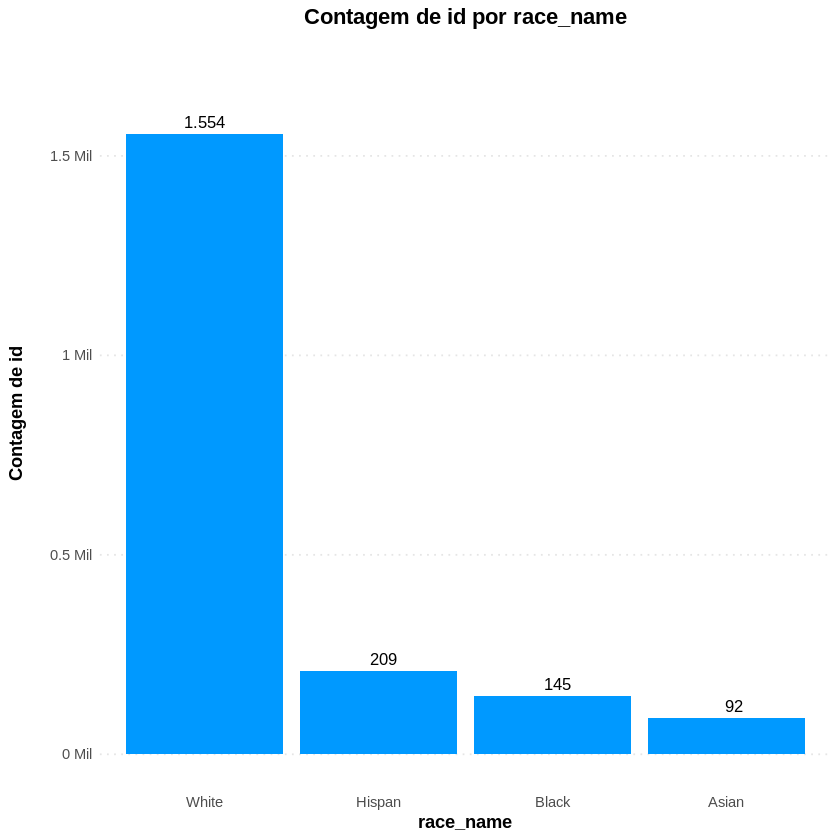

In [ ]:
# --- Gráfico 2: Gráfico de Barras Personalizado para Raça ---

# 1. Preparar os dados para o gráfico de raça (ordenar as barras)
race_data <- dados_tratados %>%
  filter(!is.na(race_name)) %>%
  count(race_name) %>%
  # Reordena o fator 'race_name' pela contagem 'n' em ordem decrescente
  mutate(race_name = reorder(race_name, -n))

# 2. Criar o gráfico de Barras
ggplot(race_data, aes(x = race_name, y = n)) +
  geom_col(fill = "#0099ff") + # Define a cor de preenchimento das barras
  # Adiciona o texto com a contagem no topo de cada barra
  geom_text(
    aes(label = format(n, big.mark = ".")), # Formata o número com ponto de milhar
    vjust = -0.5, # Posição vertical do texto (acima da barra)
    size = 3.5
  ) +
  # Formata o eixo Y para exibir em "Mil"
  scale_y_continuous(
    labels = function(x) paste(x / 1000, "Mil"),
    # Define um limite um pouco maior para dar espaço aos rótulos
    limits = c(0, max(race_data$n) * 1.1)
  ) +
  # Define os títulos e nomes dos eixos
  labs(
    title = "Contagem de id por race_name",
    x = "race_name",
    y = "Contagem de id"
  ) +
  # Aplica um tema limpo
  theme_minimal() +
  # Personalizações finais do tema
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    panel.grid.major.x = element_blank(), # Remove as linhas de grade verticais
    panel.grid.minor.y = element_blank(), # Remove as linhas de grade horizontais secundárias
    panel.grid.major.y = element_line(color = "gray90", linetype = "dotted") # Linhas pontilhadas
  )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


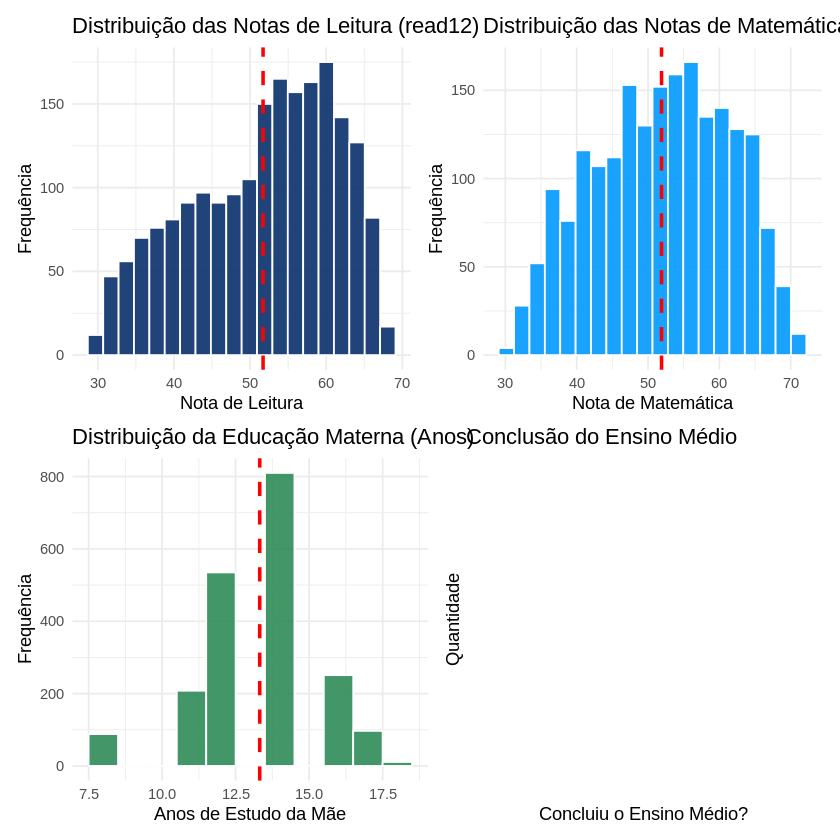

In [ ]:
# Instala o pacote 'patchwork' para combinar múltiplos gráficos
install.packages("patchwork")

# Carrega as bibliotecas necessárias
library(ggplot2)
library(dplyr)
library(patchwork) # Para organizar os gráficos
library(knitr)     # Para tabelas

# --- GRÁFICOS ---

# Gráfico 1: Histograma para Notas de Leitura (read12)
p_read12 <- ggplot(dados_tratados, aes(x = read12)) +
  geom_histogram(bins = 20, fill = "#08306b", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(read12, na.rm = TRUE)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribuição das Notas de Leitura (read12)", x = "Nota de Leitura", y = "Frequência") +
  theme_minimal()

# Gráfico 2: Histograma para Notas de Matemática (math12)
p_math12 <- ggplot(dados_tratados, aes(x = math12)) +
  geom_histogram(bins = 20, fill = "#0099ff", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(math12, na.rm = TRUE)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribuição das Notas de Matemática (math12)", x = "Nota de Matemática", y = "Frequência") +
  theme_minimal()

# Gráfico 3: Histograma para Educação da Mãe (motheduc)
p_motheduc <- ggplot(dados_tratados, aes(x = motheduc)) +
  geom_histogram(binwidth = 1, fill = "seagreen", color = "white", alpha = 0.9) +
  geom_vline(aes(xintercept = mean(motheduc, na.rm = TRUE)), color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribuição da Educação Materna (Anos)", x = "Anos de Estudo da Mãe", y = "Frequência") +
  theme_minimal()

# Gráfico 4: Gráfico de Barras para Graduação no Ensino Médio (hsgrad)
p_hsgrad <- dados_tratados %>%
  filter(!is.na(hsgrad)) %>%
  ggplot(aes(x = hsgrad, fill = hsgrad)) +
  geom_bar() +
  geom_text(stat='count', aes(label=..count..), vjust=-0.5) +
  labs(title = "Conclusão do Ensino Médio", x = "Concluiu o Ensino Médio?", y = "Quantidade") +
  scale_x_discrete(labels = c("Não", "Sim")) +
  theme_minimal() +
  theme(legend.position = "none")

# Combina todos os gráficos em um único painel
(p_read12 + p_math12) / (p_motheduc + p_hsgrad)